## Importing Relavant Libraries

In [1]:
# Importing Basic Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Default figure size for EDA
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)

# Changing default parameters of pandas 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

## Loading Data

In [2]:
# Reading file
bank_data = pd.read_csv("bank_full.csv",sep = ";")

# Renaming the column 'y' to 'target'
bank_data.rename(columns={"y": "target"},inplace = True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis

In [3]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [4]:
perform_eda(bank_data, "Bank")

EDA of Bank Data....
Size 768587
Columns 17
Records 45211
First Look of Data....


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dataset has following Numerical columns...
 1) age
 2) balance
 3) day
 4) duration
 5) campaign
 6) pdays
 7) previous


Dataset has following Categorical columns...
 1) job
 2) marital
 3) education
 4) default
 5) housing
 6) loan
 7) contact
 8) month
 9) poutcome
 10) target
Information of Data....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Univariate Analysis

In [5]:
# Percentage on bar
def per_on_bar(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [6]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

Total unique values are:  12 


Category	Value

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


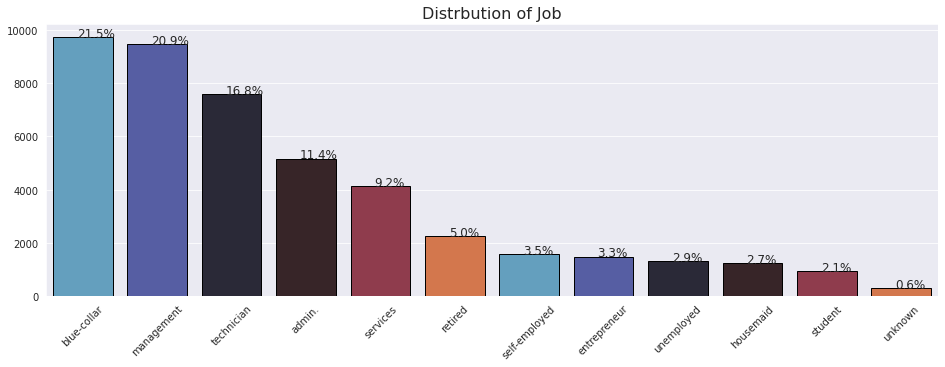

In [7]:
per_on_bar(bank_data.job, "Distrbution of Job")

Most of the people were having Job Title **Management, Blue-Collar**.

Total unique values are:  3 


Category	Value

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


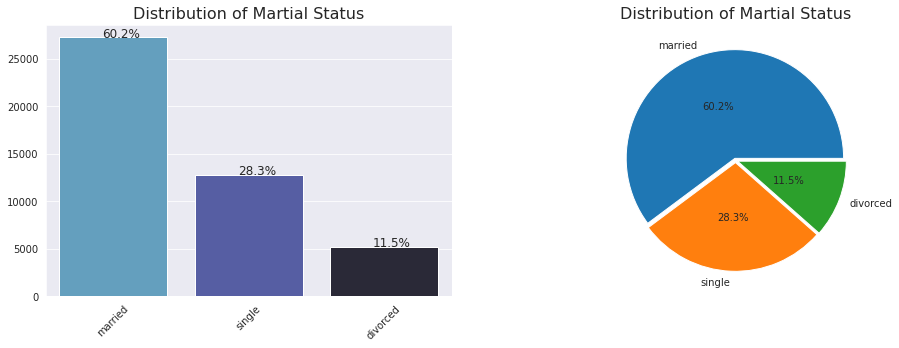

In [8]:
make_plots(bank_data.marital, "Distribution of Martial Status")

Most of them were **Married**.

Total unique values are:  4 


Category	Value

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


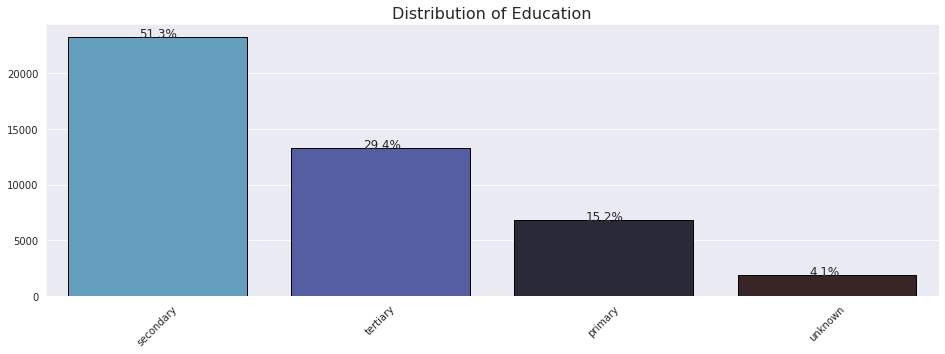

In [9]:
per_on_bar(bank_data.education, "Distribution of Education")

Most of the People were **Secondary Educated**.

Total unique values are:  2 


Category	Value

no     44396
yes      815
Name: default, dtype: int64


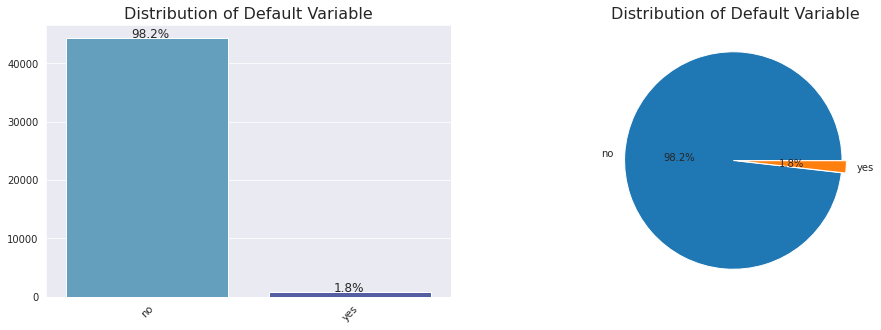

In [10]:
make_plots(bank_data.default, "Distribution of Default Variable")

Only 2% people were default

Total unique values are:  2 


Category	Value

yes    25130
no     20081
Name: housing, dtype: int64


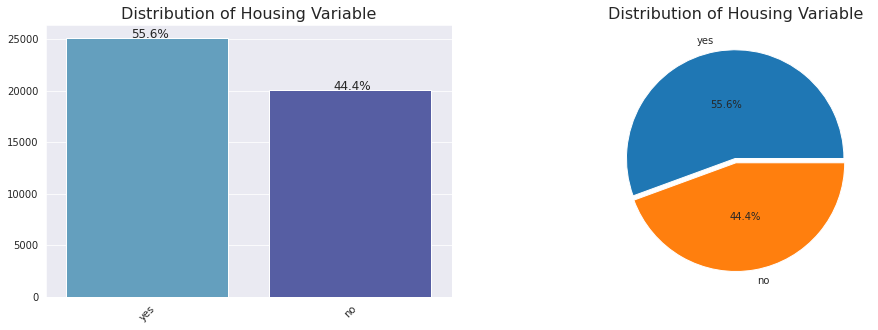

In [11]:
make_plots(bank_data.housing, "Distribution of Housing Variable")

Mostly people who applied for Loan were having **house.**

Total unique values are:  2 


Category	Value

no     39922
yes     5289
Name: target, dtype: int64


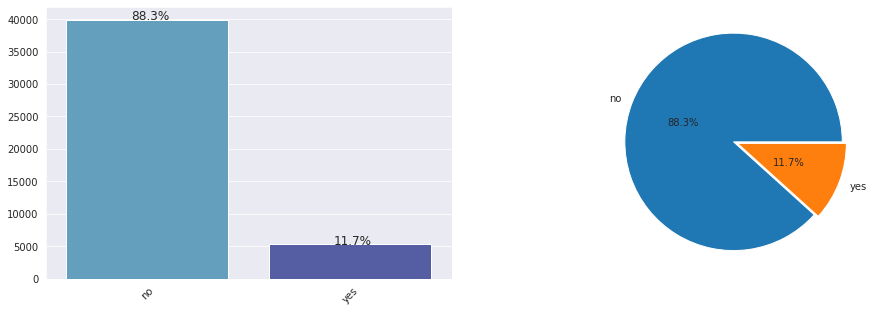

In [12]:
make_plots(bank_data.target)

This is our target feature that we have to use for prediction, but there is a problem that data is imbalanced between 2 classes. So before using it for our model we have to make it balanced.

In [13]:
# Function to make plots for numerical feature
def make_numerical_plots(feature):
    # Setting figure size
    plt.figure(figsize=(15, 5))
    
    # Making KDE plot
    plt.subplot(121)
    sns.kdeplot(feature)
    
    # Making boxen plot
    plt.subplot(122)
    sns.boxenplot(feature)
    plt.show()

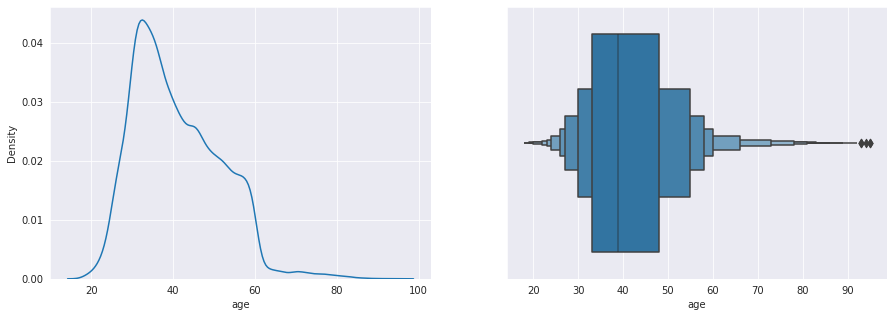

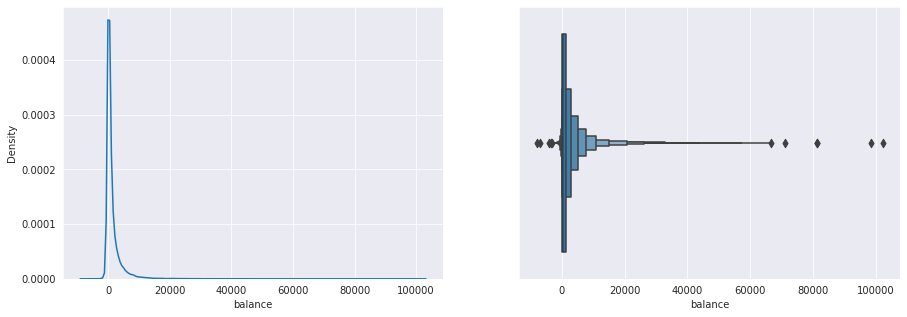

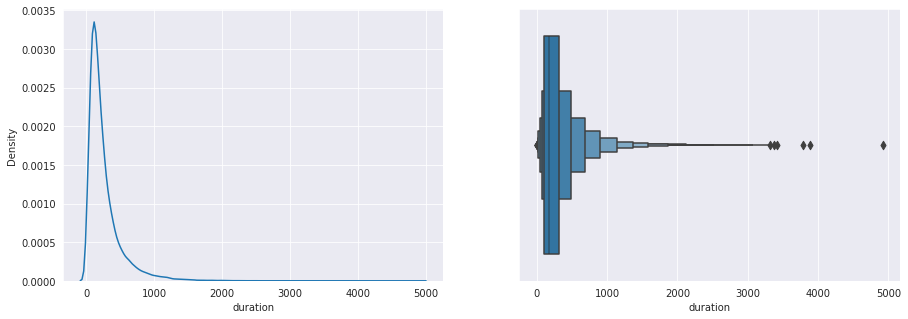

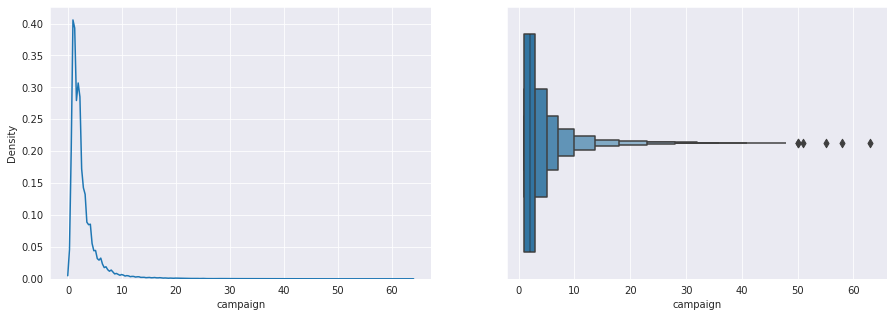

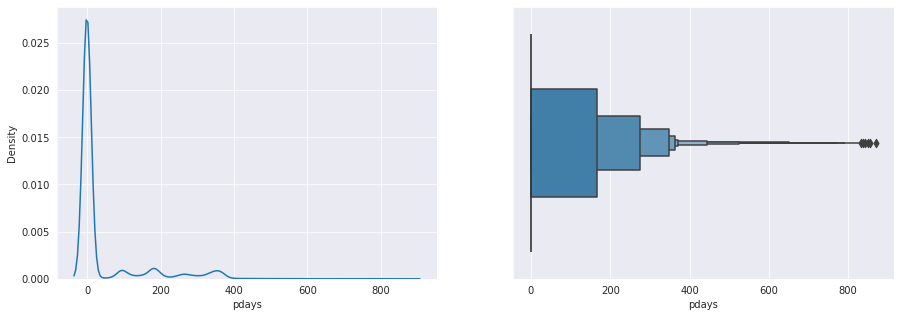

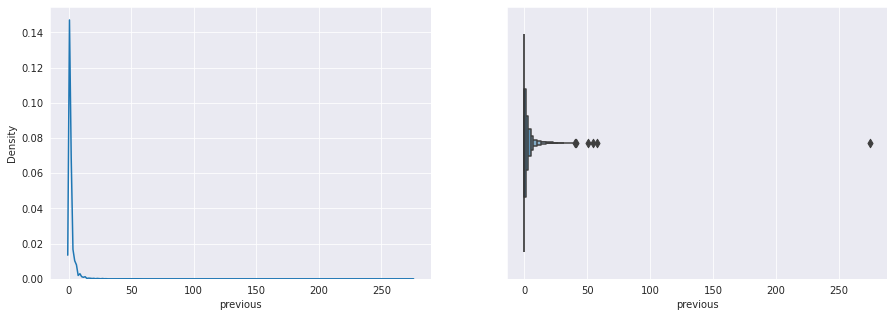

In [14]:
# PLoting numerical features
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    make_numerical_plots(bank_data[col])

### Bivariate Analysis

In [15]:
def make_crosstab(x, target_name, df=bank_data, target_value="yes", top_cat=3):
    # Code to get a random color map for graph
    color_maps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 
                  'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
                  'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
                  'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
                  'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
                  'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
                  'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
                  'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
                  'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
                  'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
                  'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
                  'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
                  'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 
                  'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
                  'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
                  'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    
    # Selecting Color map
    rand = np.random.randint(1, len(color_maps))
    cmap = color_maps[rand]
    
    # Making crosstab and then plotting it in form of bar chart
    pd.crosstab(df[target_name], df[x]).plot(kind="bar", cmap=cmap, stacked=False, figsize=(16, 5))
    plt.show()

    # Calculating the ratio 
    data = {}
    for i in df[x].unique():
        nomer = df[((df[target_name] == target_value) & (df[x] == i))]
        denom = df[(df[x] == i)]
        try:
            rate = 100*(len(nomer)/len(denom))
        except:
            rate = 0
        data[i] = rate
    
    # Sorting values according to ratio
    data = dict(sorted(data.items(), reverse=True, key=lambda item: item[1]))
    
    # Printing top 3 categories with their ratio
    for i, j in data.items():
        if top_cat > 0:
            print(f"Churn rate for category {str(i).upper()} in variable {str(x).upper()} is {j}")
            top_cat -= 1
        else:
            break

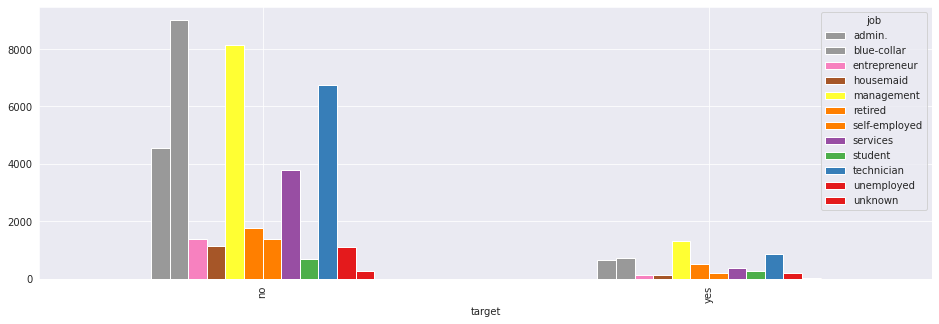

Churn rate for category STUDENT in variable JOB is 28.678038379530918
Churn rate for category RETIRED in variable JOB is 22.791519434628977
Churn rate for category UNEMPLOYED in variable JOB is 15.502686108979278


In [16]:
make_crosstab("job", "target")

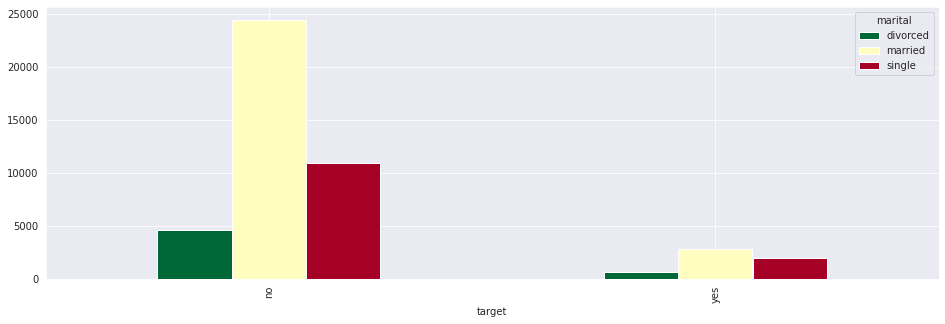

Churn rate for category SINGLE in variable MARITAL is 14.94917904612979
Churn rate for category DIVORCED in variable MARITAL is 11.945458037257538
Churn rate for category MARRIED in variable MARITAL is 10.123465863158668


In [17]:
make_crosstab("marital", "target")

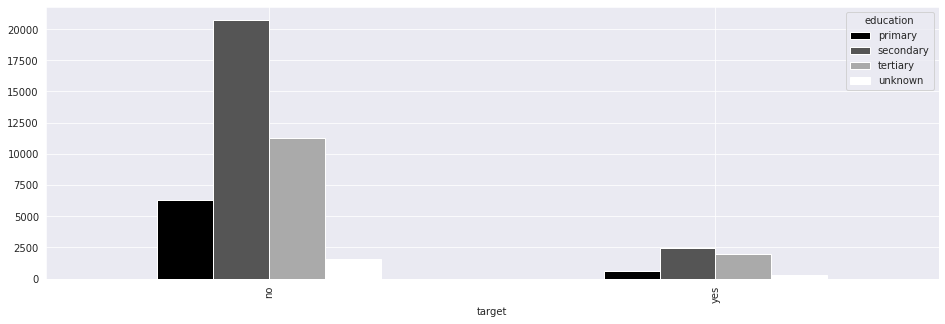

Churn rate for category TERTIARY in variable EDUCATION is 15.006390496955117
Churn rate for category UNKNOWN in variable EDUCATION is 13.5702746365105
Churn rate for category SECONDARY in variable EDUCATION is 10.559434531505904


In [18]:
make_crosstab("education", "target")

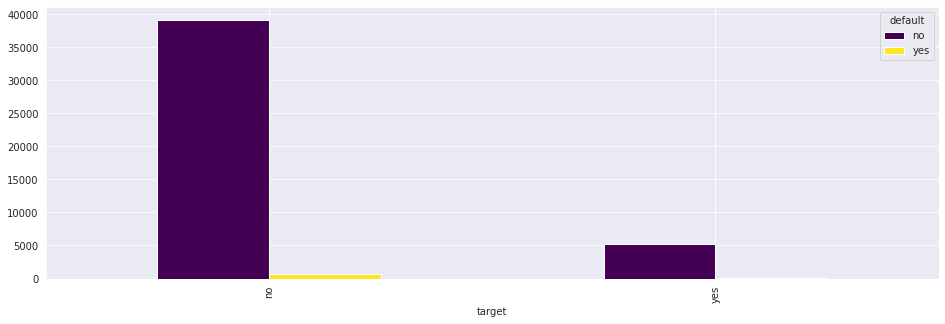

Churn rate for category NO in variable DEFAULT is 11.796107757455626
Churn rate for category YES in variable DEFAULT is 6.38036809815951


In [19]:
make_crosstab("default", "target")

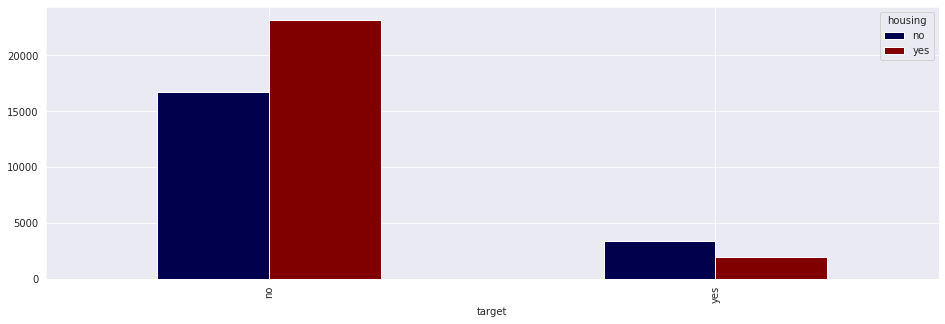

Churn rate for category NO in variable HOUSING is 16.70235546038544
Churn rate for category YES in variable HOUSING is 7.699960206923995


In [20]:
make_crosstab("housing", "target")

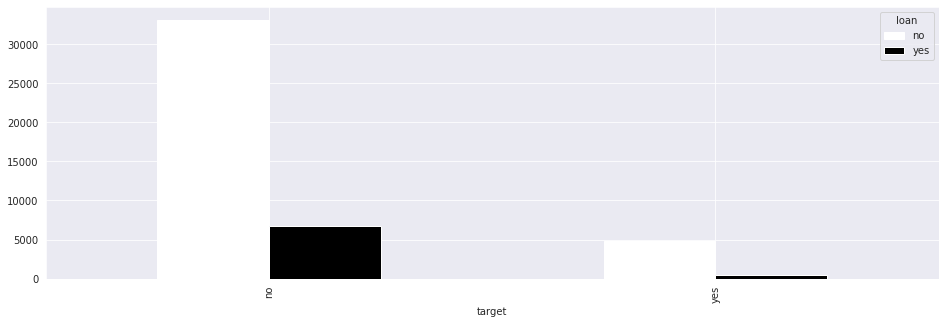

Churn rate for category NO in variable LOAN is 12.655727342165566
Churn rate for category YES in variable LOAN is 6.681391496410822


In [21]:
make_crosstab("loan", "target")

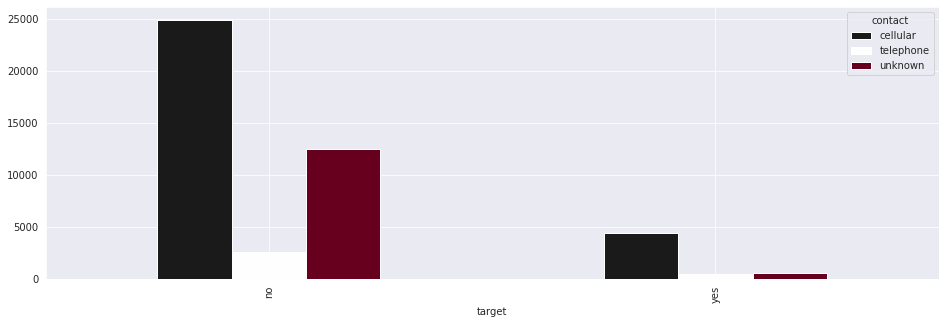

Churn rate for category CELLULAR in variable CONTACT is 14.918900460986853
Churn rate for category TELEPHONE in variable CONTACT is 13.420509291121817
Churn rate for category UNKNOWN in variable CONTACT is 4.070660522273426


In [22]:
make_crosstab("contact", "target")

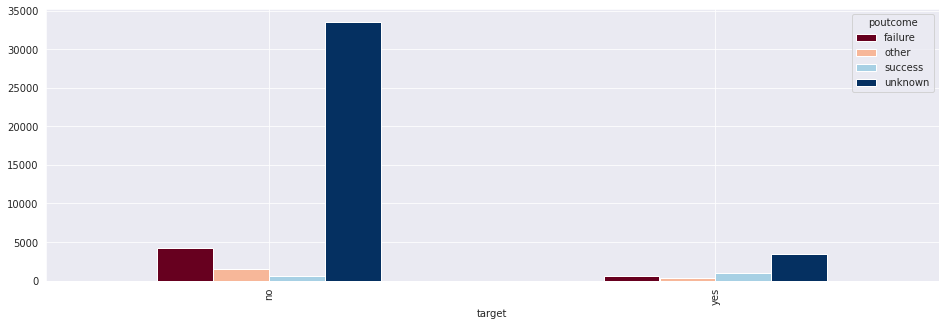

Churn rate for category SUCCESS in variable POUTCOME is 64.72534745201854
Churn rate for category OTHER in variable POUTCOME is 16.684782608695652
Churn rate for category FAILURE in variable POUTCOME is 12.609671495613139


In [23]:
make_crosstab("poutcome", "target")

### Multivariate Analysis

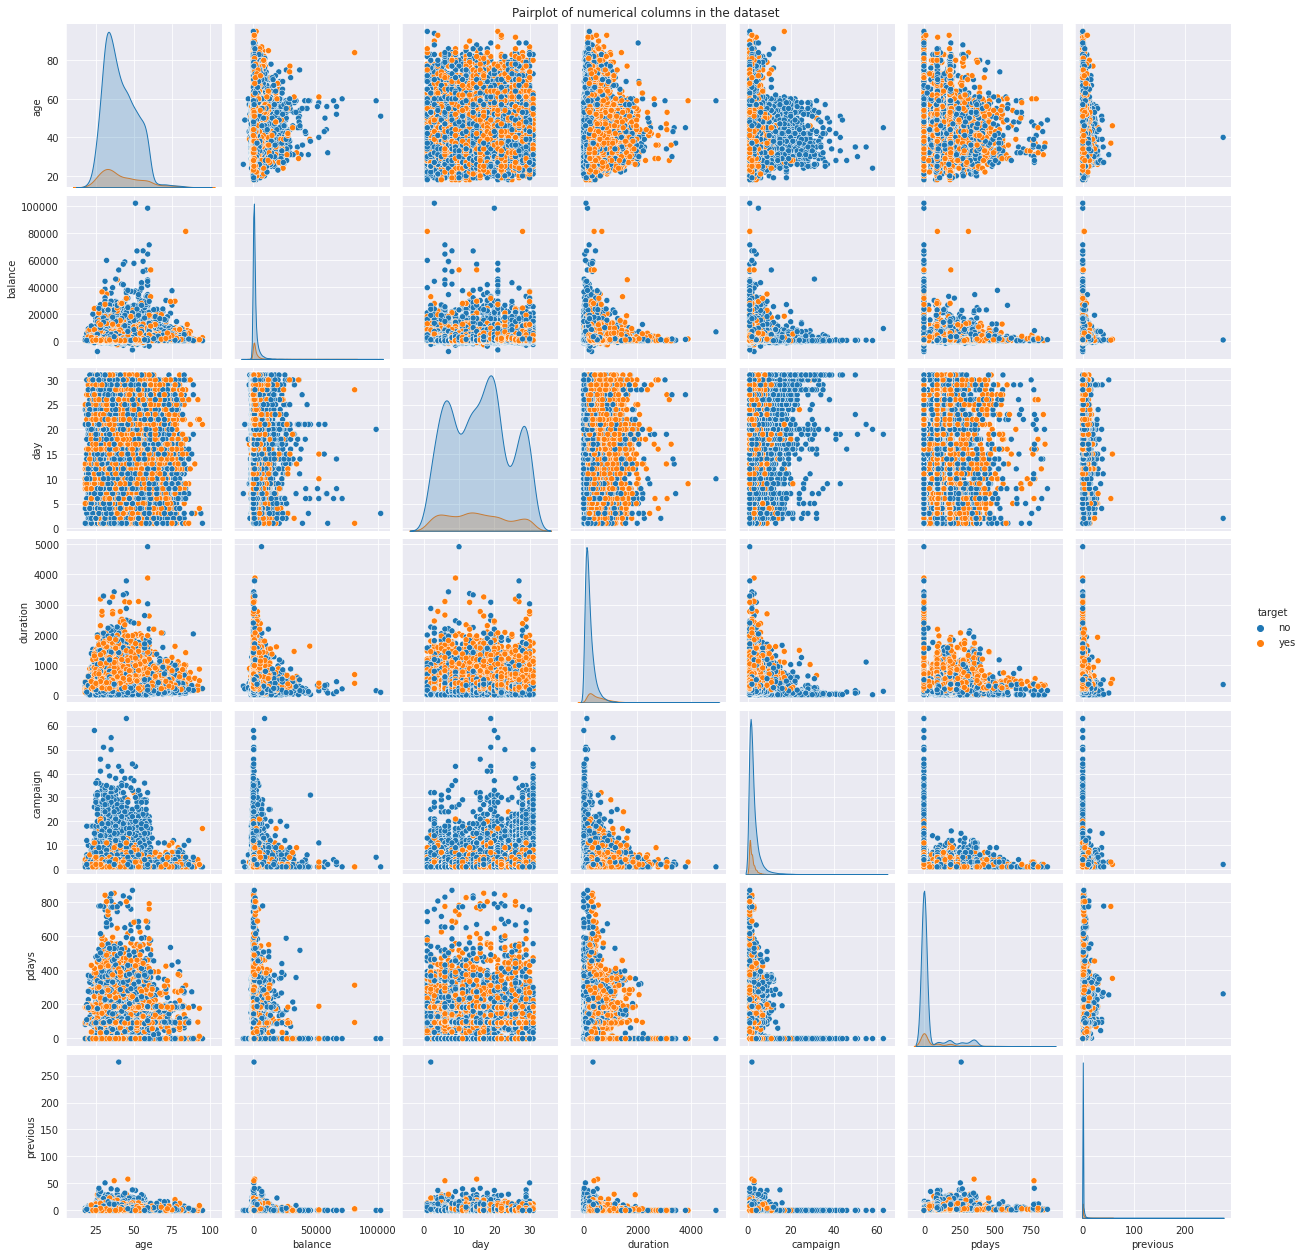

In [24]:
g = sns.pairplot(data = bank_data,hue = "target",diag_kws={'bw': 0.2})
g.fig.suptitle("Pairplot of numerical columns in the dataset",y = 1)
plt.show()

# Data Preprocessing

#### Null Values

In [25]:
#Check if any entry is null
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

Data has no Null value.

#### Outliers

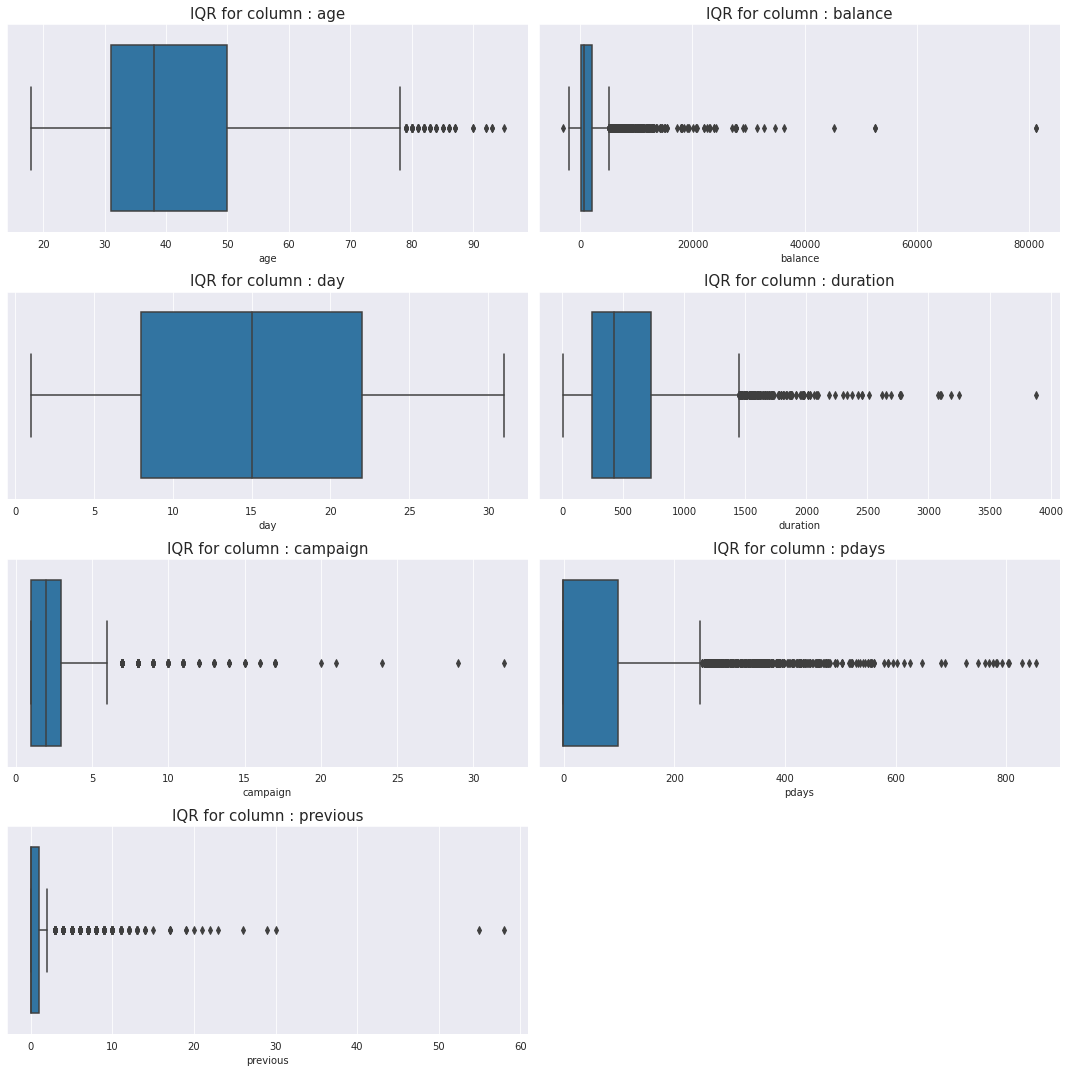

In [26]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = [15,15])
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cnt = 1
bank_data_yes = bank_data[bank_data.target=="yes"]
for col in num_cols:
    ax = plt.subplot(4,2,cnt)
    sns.boxplot(bank_data_yes[col])
    cnt+=1
    plot_name = "IQR for column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show() 

There are a lot of outliers in the numerical features for which the target variable value is 'yes' because of which the outliers have not been removed.

In [27]:
outlier_index = bank_data[((bank_data.target=="yes") & ((bank_data.age > 85) | (bank_data.balance > 40000) | (bank_data.duration > 3000) | (bank_data.campaign > 15) | (bank_data.previous > 30)))].index
bank_data.drop(outlier_index, axis=0, inplace=True)
print(f"{len(outlier_index)} outliers has been removed.")

39 outliers has been removed.


# Feature Engineering

### Converting binary variables (Yes/No) to 0/1

In [28]:
# List of variables to map
varlist =  ['housing', 'loan', 'default', 'target']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
bank_data[varlist] = bank_data[varlist].apply(binary_map)

### Converting month to numerical column

In [29]:
# Defining the map function
def month_converter(month):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months.index(month) + 1

# Applying the function to the month list
bank_data.month = bank_data.month.apply(month_converter)

### Feature Correlation

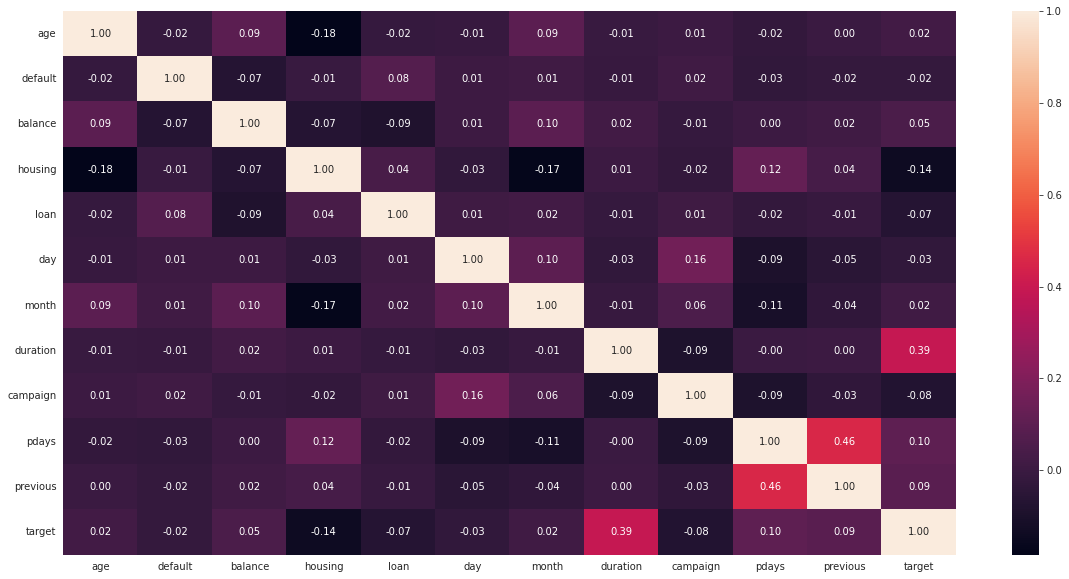

In [30]:
# correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(bank_data.corr(),annot = True, fmt='.2f')
plt.yticks(rotation=0) 
plt.show()

### Feature Encoding

In [31]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(bank_data[['marital', 'education', 'contact', 'poutcome', 'job']], drop_first=True)

# Adding the results to the master dataframe
bank_data = pd.concat([bank_data, dummy], axis=1)

In [32]:
# We have created dummies for the below variables, so we can drop them
bank_data = bank_data.drop(['marital', 'education', 'contact', 'poutcome', 'job'], 1)

bank_data.shape

(45172, 33)

### Feature Scaling

In [33]:
# Applying standard scaling to numerical columns
cols = ['age','balance','day','month','duration','campaign', 'pdays', 'previous']

scaler = MinMaxScaler()
bank_data[cols] = scaler.fit_transform(bank_data[cols])

bank_data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,target,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.519481,0,0.092259,1,0,0.133333,0.363636,0.053070,0.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0.337662,0,0.073067,1,0,0.133333,0.363636,0.030704,0.0,0.0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.194805,0,0.072822,1,1,0.133333,0.363636,0.015453,0.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.376623,0,0.086476,1,0,0.133333,0.363636,0.018707,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0.194805,0,0.072812,0,0,0.133333,0.363636,0.040260,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [38]:
# Splitting into input and output
X = bank_data.drop("target", axis=1)
y = bank_data.target

Total unique values are:  2 


Category	Value

0    39922
1     5250
Name: target, dtype: int64


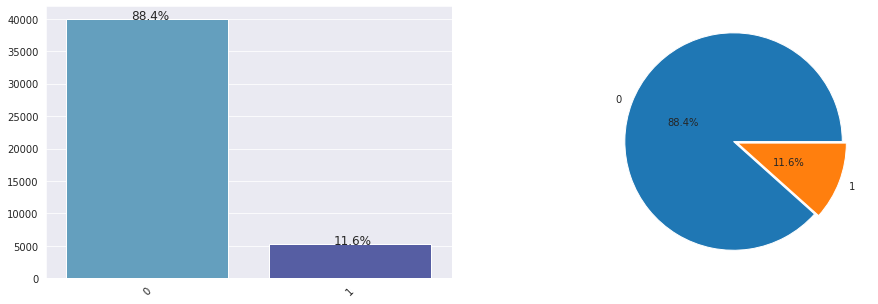

In [39]:
make_plots(y)

In [40]:
# Balancing data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

Total unique values are:  2 


Category	Value

0    39922
1    39922
Name: target, dtype: int64


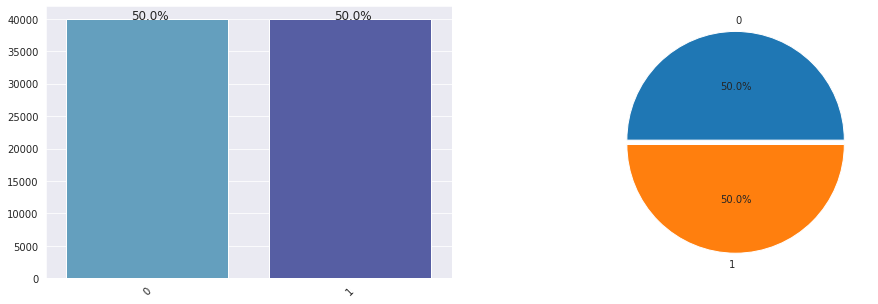

In [41]:
make_plots(y)

In [46]:
# Spliting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Building

In [47]:
# check the performance on diffrent regressor
models = []
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('MultinomialNB', MultinomialNB()))

+ ==================================================================================================== +
			1-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8387743174417633
--------------------------------------------------
F1 :  [0.83905651 0.83849113]
--------------------------------------------------
Reacll :  [0.83766018 0.83989611]
--------------------------------------------------
Precision :  [0.84045751 0.83709085]
--------------------------------------------------
ROC AUC   :  0.8387781445012998
--------------------------------------------------
Confusion Matrix....
 [[10067  1951]
 [ 1911 10025]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     12018
           1       0.84      0.84      0.84     11936

    accuracy        

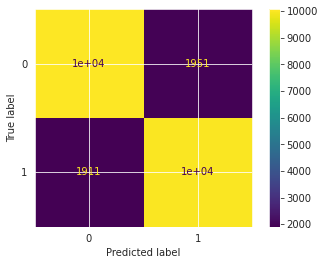

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 2.604 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8829005594055273
--------------------------------------------------
F1 :  [0.87505011 0.88982285]
--------------------------------------------------
Reacll :  [0.81727409 0.94897788]
--------------------------------------------------
Precision :  [0.94161634 0.83761   ]
--------------------------------------------------
ROC AUC   :  0.8831259854521167
--------------------------------------------------
Confusion Matrix....
 [[ 9822  2196]
 [  609 11327]]
--------------------------------------------------
Classif

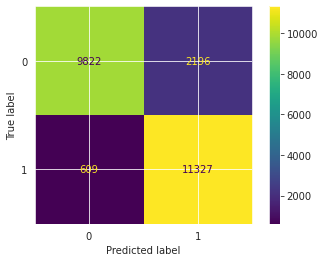

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 60.62 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.941763379811305
--------------------------------------------------
F1 :  [0.94046349 0.94300772]
--------------------------------------------------
Reacll :  [0.91679148 0.96690684]
--------------------------------------------------
Precision :  [0.96539034 0.92026154]
--------------------------------------------------
ROC AUC   :  0.9418491579543107
--------------------------------------------------
Confusion Matrix....
 [[11018  1000]
 [  395 11541]]
--------------------------------------------------
Clas

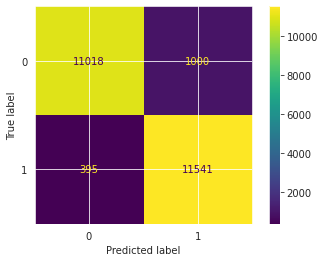

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 10.78 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For AdaBoostClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8927945228354346
--------------------------------------------------
F1 :  [0.89212803 0.89345283]
--------------------------------------------------
Reacll :  [0.88359128 0.90206099]
--------------------------------------------------
Precision :  [0.90083135 0.8850074 ]
--------------------------------------------------
ROC AUC   :  0.8928261358520753
--------------------------------------------------
Confusion Matrix....
 [[10619  1399]
 [ 1169 10767]]
--------------------------------------------------
Class

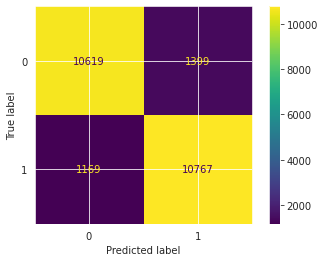

							-----------------------------------------------------------
							 Time for detection (AdaBoostClassifier) : 5.466 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9064874342489772
--------------------------------------------------
F1 :  [0.90598506 0.90698447]
--------------------------------------------------
Reacll :  [0.89806956 0.91496314]
--------------------------------------------------
Precision :  [0.91404133 0.89914375]
--------------------------------------------------
ROC AUC   :  0.9065163495262021
--------------------------------------------------
Confusion Matrix....
 [[10793  1225]
 [ 1015 10921]]
--------------------------------------------------
Class

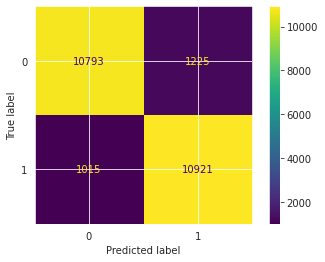

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 1.01 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For MultinomialNB The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6828922100692995
--------------------------------------------------
F1 :  [0.69237    0.67281185]
--------------------------------------------------
Reacll :  [0.71126643 0.65432306]
--------------------------------------------------
Precision :  [0.67445163 0.69237589]
--------------------------------------------------
ROC AUC   :  0.6827947449915387
--------------------------------------------------
Confusion Matrix....
 [[8548 3470]
 [4126 7810]]
--------------------------------------------------
Classification 

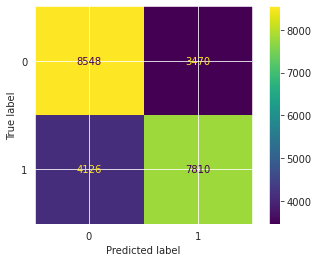

							-----------------------------------------------------------
							 Time for detection (MultinomialNB) : 0.436 seconds...
							-----------------------------------------------------------



In [48]:
# metrices to store performance
acc = []
pre = []
f1  = []
con = []
rec = []
roc = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # ROC_AUC Score
    roc_sco = roc_auc_score(y_test, y_pred)
    roc.append(roc_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('ROC AUC   : ', roc_sco)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [50]:
comp = pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "ROC_AUC Score": roc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})
comp

,Model,Accuracy,ROC_AUC Score,Precision,Recall,F1_Score,Confusion Matrix
0,LogisitcRegression,0.838774,0.838778,"[0.8404575054266155, 0.8370908483633934]","[0.8376601764020636, 0.8398961126005362]","[0.8390565094182364, 0.8384911341585815]","[[10067, 1951], [1911, 10025]]"
1,KNeighborsClassifier,0.882901,0.883126,"[0.9416163359217716, 0.8376099977815573]","[0.8172740888666999, 0.9489778820375335]","[0.8750501135908059, 0.8898228524293963]","[[9822, 2196], [609, 11327]]"
2,RandomForestClassifier,0.941763,0.941849,"[0.9653903443441689, 0.920261542141775]","[0.9167914794474954, 0.966906836461126]","[0.940463488540822, 0.9430077215345019]","[[11018, 1000], [395, 11541]]"
3,AdaBoostClassifier,0.892795,0.892826,"[0.9008313539192399, 0.8850073976656255]","[0.8835912797470461, 0.9020609919571045]","[0.8921280349491725, 0.8934528254916605]","[[10619, 1399], [1169, 10767]]"
4,DecisionTreeClassifier,0.906487,0.906516,"[0.9140413279132791, 0.8991437510291453]","[0.8980695623231819, 0.9149631367292225]","[0.905985058339629, 0.9069844697284277]","[[10793, 1225], [1015, 10921]]"
5,MultinomialNB,0.682892,0.682795,"[0.6744516332649518, 0.6923758865248227]","[0.7112664336828092, 0.6543230563002681]","[0.6923699983800422, 0.6728118538938663]","[[8548, 3470], [4126, 7810]]"


From this we can see that Random Forest is performing well.

# Building Final Model

In [51]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy :  0.9422643399849712
--------------------------------------------------
F1 :  [0.9410712  0.94341012]
--------------------------------------------------
Reacll :  [0.91887169 0.96581769]
--------------------------------------------------
Precision :  [0.96436992 0.92201872]
--------------------------------------------------
ROC AUC   :  0.9423446934156406
--------------------------------------------------
Confusion Matrix....
 [[11043   975]
 [  408 11528]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     12018
           1       0.92      0.97      0.94     11936

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954

--------------------------------------------------
Plotting Confusion Matrix...



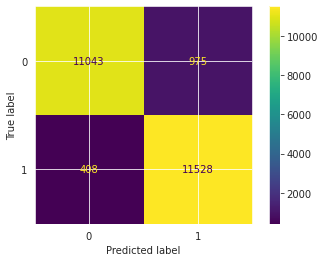

In [53]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# ROC_AUC Score
roc_sco = roc_auc_score(y_test, y_pred)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)   
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('ROC AUC   : ', roc_sco)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
plot_confusion_matrix(model, X_test, y_test)
plt.show()